# Initial Statistics

In [1]:
import mysql.connector
import operator

import numpy as np
import pandas as pd

import matplotlib as mlp
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

#import plotly as py
import plotly.offline as po
import plotly.graph_objs as go
import plotly.express as px

import ipywidgets as widgets
# import seaborn as sns


In [2]:
%matplotlib inline 
po.init_notebook_mode(connected=True)

- **Number of metabolites**

In [3]:
#Ir buscar toda a tabela bioanalysis_metabolite à BD

cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='bioeco')

sql_query = pd.read_sql_query(''' select * from bioanalysis_metabolite ''', cnx, parse_dates=True)

df = pd.DataFrame(sql_query, columns=['id','common_name', 'id_bioeco','inchi', 'inchi_key', 'smiles'])

print(df)

        id            common_name            id_bioeco  \
0        1             tobramycin  9222799514525203483   
1        2          Telithromycin  9222710493671371933   
2        3        UNII-YCP4CS0W03  9222602442150781005   
3        4     3,5-DIMETHYLPHENOL  9222471406831838542   
4        5     5-Oxooctanoic acid  9222286964594510425   
...    ...                    ...                  ...   
4299  4300         SCHEMBL2580764  7710985295602631400   
4300  4301             Prochloraz  7710932831858002274   
4301  4302      1,2,6-HEXANETRIOL  7710136659027825385   
4302  4303  2-Methylbutanoic acid  7709180902199124149   
4303  4304     (S,S,R,R)-Orlistat  7708370838353571962   

                                                  inchi  \
0     InChI=1S/C18H37N5O9/c19-3-9-8(25)2-7(22)17(29-...   
1     InChI=1S/C43H65N5O10/c1-12-33-43(8)37(48(41(53...   
2     InChI=1S/C6H12N4.H2O4S/c1-4(2)10-6(8)5(7)3-9-1...   
3     InChI=1S/C8H10O/c1-6-3-7(2)5-8(9)4-6/h3-5,9H,1...   
4     In

In [4]:
#Contar nº de ids, praticamente contar o número de linhas
df['id'].count()

4304

Existe *4304* metabolitos na base de dados **Bioanalysis**.

In [5]:
#Limpar duplicados, o bioeconomics tem um erro de duplicados então não podemos contar a coluna id_bioeco
#senão não há duplicados para apagar

df_cleaned = df[~df.duplicated(['common_name','inchi','inchi_key', 'smiles'])]

In [6]:
df_cleaned

,id,common_name,id_bioeco,inchi,inchi_key,smiles
0,1,tobramycin,9222799514525203483,InChI=1S/C18H37N5O9/c19-3-9-8(25)2-7(22)17(29-...,NLVFBUXFDBBNBW-PBSUHMDJSA-N,C1C(C(C(C(C1N)OC2C(C(C(C(O2)CO)O)N)O)O)OC3C(CC...
1,2,Telithromycin,9222710493671371933,InChI=1S/C43H65N5O10/c1-12-33-43(8)37(48(41(53...,LJVAJPDWBABPEJ-UHFFFAOYSA-N,CCC1C2(C(C(C(=O)C(CC(C(C(C(=O)C(C(=O)O1)C)C)OC...
2,3,UNII-YCP4CS0W03,9222602442150781005,InChI=1S/C6H12N4.H2O4S/c1-4(2)10-6(8)5(7)3-9-1...,VKGPVOKDWZAKKE-UHFFFAOYSA-N,CC(C)N1C(=C(C=N1)N)N.OS(=O)(=O)O
3,4,"3,5-DIMETHYLPHENOL",9222471406831838542,"InChI=1S/C8H10O/c1-6-3-7(2)5-8(9)4-6/h3-5,9H,1...",TUAMRELNJMMDMT-UHFFFAOYSA-N,CC1=CC(=CC(=C1)O)C
4,5,5-Oxooctanoic acid,9222286964594510425,InChI=1S/C8H14O3/c1-2-4-7(9)5-3-6-8(10)11/h2-6...,OHGVWVVPDOAZSH-UHFFFAOYSA-N,CCCC(=O)CCCC(=O)O
5,6,AC1LCVJ0,9222148300385709759,InChI=1S/C10H14N5O7P/c11-8-5-9(13-2-12-8)15(3-...,UDMBCSSLTHHNCD-ASCDQALMSA-N,C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)O)O)O
6,7,3-Chloro-5-fluoroisonicotinic acid,9221885079977129855,InChI=1S/C6H3ClFNO2/c7-3-1-9-2-4(8)5(3)6(10)11...,APKYTXKVPCYUOG-UHFFFAOYSA-N,C1=C(C(=C(C=N1)Cl)C(=O)O)F
7,8,None,9221877112145259159,InChI=1S/C61H86N13O13P.CN.Co/c1-29-21-38-39(22...,WNHNILJCIPJCDB-UHFFFAOYSA-N,CC1=CC2=C(C=C1C)N(C=N2)C3C(C(C(O3)CO)O[P+](=O)...
8,9,2-(Hexyloxy)ethanol,9221440159283858055,"InChI=1S/C8H18O2/c1-2-3-4-5-7-10-8-6-9/h9H,2-8...",UPGSWASWQBLSKZ-UHFFFAOYSA-N,CCCCCCOCCO
9,10,Methyl jasmonate,9221308421455500483,InChI=1S/C13H20O3/c1-3-4-5-6-11-10(7-8-12(11)1...,GEWDNTWNSAZUDX-PLNGDYQASA-N,CCC=CCC1C(CCC1=O)CC(=O)OC


In [7]:
#Contar nº de ids únicos, é como contar o nº de linhas outra vez
df_cleaned['id'].nunique()

4292

Existe *4292* metabolitos na base de dados **Bioanalysis**, sem o erro de duplicação do **Bioeconomis**.

In [8]:
cnx.close()

Usando agora outra query vamos contar o número de metabolitos para apenas um determinado período de tempo **(01/18 a 06/19)**. Esta query será representativa do número total de preços existentes no **bioanalysis** e que estão apenas nas unidades das **g e derivados**.

NOTA: Será que vale a pena apenas selecionar os preços distintos e retirar os duplicados??

In [9]:
# Dataframe com query a selecionar todos os preços com unidades de g ou derivados, e no período de tempo entre 01/18 e 06/19

cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='bioeco')

sql_query = pd.read_sql_query(''' select bioanalysis_metabolite_price.metabolite_id       as metab_id,  
                                  bioanalysis_metabolite.common_name                      as metab_name,
                                  bioanalysis_metabolite_price.date, 
                                  bioanalysis_metabolite_price.price                      as price, 
                                  bioanalysis_metabolite_price.amount                     as amount, 
                                  bioanalysis_metabolite_price.unity                      as unity, 
                                  if(provider.name is null, "None", provider.name)        as provider_name, 
                                  bioanalysis_metabolite_price.source                     as source,
                                  price/amount                                            as price_per_unity,
                                  price/amount*convert_to_g(unity)                        as price_per_g,
                                  year(date)                                              as year, 
                                  month(date)                                             as month
                                  from bioanalysis_metabolite_price
                                  JOIN provider 
                                      on provider.id = bioanalysis_metabolite_price.provider_id
                                  JOIN bioanalysis_metabolite
                                      on bioanalysis_metabolite_price.metabolite_id = bioanalysis_metabolite.id
                                  where convert_to_g(unity) is not null and ((year(date)*10000) + (month(date)*100) between 20180100 and 20190600)
                              ''', cnx, index_col = 'date', parse_dates=True)  

df = pd.DataFrame(sql_query, columns=['metab_id','metab_name', 'price','amount', 'unity', 'provider_name', 'source', 'price_per_unity', 'price_per_g', 'year', 'month'])

print(df)

                     metab_id          metab_name   price  amount unity  \
date                                                                      
2018-01-11 21:39:13         1          tobramycin   158.0     1.0     g   
2018-01-11 21:39:13         1          tobramycin    48.6   100.0    mg   
2018-01-11 21:39:13         1          tobramycin    30.0     1.0     g   
2018-01-11 21:39:13         1          tobramycin    69.9     1.0     g   
2018-01-11 21:39:13         1          tobramycin   149.5     1.0     g   
...                       ...                 ...     ...     ...   ...   
2018-09-22 17:39:45      4304  (S,S,R,R)-Orlistat  9250.0    50.0    mg   
2018-10-22 17:41:50      4304  (S,S,R,R)-Orlistat  6750.0    25.0    mg   
2018-10-22 17:41:50      4304  (S,S,R,R)-Orlistat  9250.0    50.0    mg   
2018-10-22 17:41:51      4304  (S,S,R,R)-Orlistat  6750.0    25.0    mg   
2018-10-22 17:41:51      4304  (S,S,R,R)-Orlistat  9250.0    50.0    mg   

                        

In [10]:
#counting all the metabolites in the DB BIOANALYSIS
df['metab_id'].nunique()

2283

Existem *2283* metabolitos na base de dados **bioanalysis** que têm preços na unidade das gramas e na janela de tempo determinada. 

In [11]:
# Ver quantos valores nulos existe em cada coluna
df.isnull().sum()

metab_id             0
metab_name         364
price                0
amount               0
unity                0
provider_name        0
source               0
price_per_unity    295
price_per_g        295
year                 0
month                0
dtype: int64

In [12]:
df[df.amount == 0]  #existe preços onde o amount é zero ...

,metab_id,metab_name,price,amount,unity,provider_name,source,price_per_unity,price_per_g,year,month
date,,,,,,,,,,,
2018-10-22 15:22:54,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2018,10
2018-11-22 16:23:15,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2018,11
2018-12-07 14:41:16,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2018,12
2019-01-07 14:41:27,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2019,1
2019-02-07 14:41:35,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2019,2
2019-03-07 14:41:44,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2019,3
2019-04-07 13:41:51,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2019,4
2018-10-22 23:49:04,223,ERYTHRITOL,24.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2018,10
2018-11-23 00:50:09,223,ERYTHRITOL,24.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2018,11


Temos preços onde o amount é zero, isto faz com que os preços por unidade e por gramas sejam nulos. É preciso tratar disto.

In [13]:
df.count()

metab_id           836888
metab_name         836524
price              836888
amount             836888
unity              836888
provider_name      836888
source             836888
price_per_unity    836593
price_per_g        836593
year               836888
month              836888
dtype: int64

A dataframe *df* tem 836888 preços.

In [14]:
#Criar nova dataframe onde não existem preços com amounts a 0
df_noNA = df[~(df['amount'] == 0)]

In [15]:
df_noNA.isnull().sum()

metab_id             0
metab_name         364
price                0
amount               0
unity                0
provider_name        0
source               0
price_per_unity      0
price_per_g          0
year                 0
month                0
dtype: int64

Nova dataframe **df_noNA** não tem nulls nos preços. Está limpa de preços com amounts a zero.

In [16]:
# Contar o numero de metabolitos únicos, é o mesmo que antes
df_noNA['metab_id'].nunique()

2283

In [17]:
# Contar o número de preços, praticamente é o mesmo que ver nº de linhas
# Aqui dá para ver que o nulos na coluna de metab_name não foram apagados por isso é que são menos linhas (não é importante)
df_noNA.count()

metab_id           836593
metab_name         836229
price              836593
amount             836593
unity              836593
provider_name      836593
source             836593
price_per_unity    836593
price_per_g        836593
year               836593
month              836593
dtype: int64

A dataframe *df_noNA* tem 836593 preços! 

 - **Number of prices per metabolite** (incluindo apenas os preços correspondentes às gramas)

In [18]:
#como se pode ver esta df só tem preços para gramas
df_noNA['unity'].unique()

array(['g', 'mg', 'kg'], dtype=object)

In [19]:
#Fazer groupby por id do metabolito
for k,g in df_noNA.groupby('metab_id'):
    print('Metabolite_id:', k)
    print('Num_price:', g.shape[0])

Metabolite_id: 1
Num_price: 498
Metabolite_id: 4
Num_price: 1149
Metabolite_id: 5
Num_price: 220
Metabolite_id: 7
Num_price: 362
Metabolite_id: 9
Num_price: 247
Metabolite_id: 10
Num_price: 9
Metabolite_id: 11
Num_price: 8
Metabolite_id: 12
Num_price: 307
Metabolite_id: 13
Num_price: 2604
Metabolite_id: 14
Num_price: 7
Metabolite_id: 17
Num_price: 160
Metabolite_id: 18
Num_price: 8
Metabolite_id: 23
Num_price: 78
Metabolite_id: 24
Num_price: 63
Metabolite_id: 25
Num_price: 10
Metabolite_id: 26
Num_price: 79
Metabolite_id: 27
Num_price: 31
Metabolite_id: 28
Num_price: 475
Metabolite_id: 30
Num_price: 633
Metabolite_id: 31
Num_price: 708
Metabolite_id: 32
Num_price: 669
Metabolite_id: 34
Num_price: 474
Metabolite_id: 36
Num_price: 955
Metabolite_id: 39
Num_price: 108
Metabolite_id: 40
Num_price: 241
Metabolite_id: 41
Num_price: 903
Metabolite_id: 42
Num_price: 104
Metabolite_id: 46
Num_price: 691
Metabolite_id: 48
Num_price: 1071
Metabolite_id: 49
Num_price: 430
Metabolite_id: 50
Num_pri

Metabolite_id: 573
Num_price: 1352
Metabolite_id: 574
Num_price: 15
Metabolite_id: 575
Num_price: 1262
Metabolite_id: 577
Num_price: 45
Metabolite_id: 578
Num_price: 21
Metabolite_id: 579
Num_price: 566
Metabolite_id: 580
Num_price: 747
Metabolite_id: 581
Num_price: 248
Metabolite_id: 589
Num_price: 180
Metabolite_id: 591
Num_price: 344
Metabolite_id: 592
Num_price: 351
Metabolite_id: 595
Num_price: 5
Metabolite_id: 596
Num_price: 455
Metabolite_id: 598
Num_price: 205
Metabolite_id: 600
Num_price: 157
Metabolite_id: 601
Num_price: 479
Metabolite_id: 602
Num_price: 479
Metabolite_id: 603
Num_price: 3001
Metabolite_id: 605
Num_price: 1364
Metabolite_id: 608
Num_price: 546
Metabolite_id: 609
Num_price: 269
Metabolite_id: 610
Num_price: 208
Metabolite_id: 611
Num_price: 8
Metabolite_id: 614
Num_price: 19
Metabolite_id: 615
Num_price: 10
Metabolite_id: 618
Num_price: 2051
Metabolite_id: 619
Num_price: 56
Metabolite_id: 622
Num_price: 24
Metabolite_id: 625
Num_price: 154
Metabolite_id: 626
N

Metabolite_id: 1317
Num_price: 71
Metabolite_id: 1318
Num_price: 48
Metabolite_id: 1319
Num_price: 1214
Metabolite_id: 1320
Num_price: 193
Metabolite_id: 1322
Num_price: 4
Metabolite_id: 1323
Num_price: 27
Metabolite_id: 1325
Num_price: 783
Metabolite_id: 1327
Num_price: 165
Metabolite_id: 1328
Num_price: 160
Metabolite_id: 1329
Num_price: 9
Metabolite_id: 1330
Num_price: 715
Metabolite_id: 1331
Num_price: 98
Metabolite_id: 1332
Num_price: 4
Metabolite_id: 1333
Num_price: 1339
Metabolite_id: 1334
Num_price: 77
Metabolite_id: 1335
Num_price: 8
Metabolite_id: 1338
Num_price: 20
Metabolite_id: 1340
Num_price: 1714
Metabolite_id: 1344
Num_price: 368
Metabolite_id: 1347
Num_price: 577
Metabolite_id: 1352
Num_price: 8
Metabolite_id: 1353
Num_price: 522
Metabolite_id: 1355
Num_price: 492
Metabolite_id: 1356
Num_price: 26
Metabolite_id: 1357
Num_price: 41
Metabolite_id: 1361
Num_price: 8
Metabolite_id: 1362
Num_price: 142
Metabolite_id: 1365
Num_price: 448
Metabolite_id: 1367
Num_price: 852
Me

Metabolite_id: 2148
Num_price: 606
Metabolite_id: 2149
Num_price: 5
Metabolite_id: 2150
Num_price: 102
Metabolite_id: 2153
Num_price: 31
Metabolite_id: 2154
Num_price: 31
Metabolite_id: 2155
Num_price: 57
Metabolite_id: 2156
Num_price: 721
Metabolite_id: 2157
Num_price: 370
Metabolite_id: 2158
Num_price: 54
Metabolite_id: 2161
Num_price: 38
Metabolite_id: 2162
Num_price: 742
Metabolite_id: 2168
Num_price: 1351
Metabolite_id: 2169
Num_price: 11
Metabolite_id: 2170
Num_price: 109
Metabolite_id: 2172
Num_price: 8
Metabolite_id: 2175
Num_price: 125
Metabolite_id: 2180
Num_price: 88
Metabolite_id: 2181
Num_price: 706
Metabolite_id: 2182
Num_price: 113
Metabolite_id: 2183
Num_price: 97
Metabolite_id: 2184
Num_price: 1454
Metabolite_id: 2187
Num_price: 4
Metabolite_id: 2189
Num_price: 10
Metabolite_id: 2190
Num_price: 2011
Metabolite_id: 2191
Num_price: 44
Metabolite_id: 2195
Num_price: 1252
Metabolite_id: 2196
Num_price: 553
Metabolite_id: 2197
Num_price: 1242
Metabolite_id: 2200
Num_price: 

Num_price: 41
Metabolite_id: 3036
Num_price: 69
Metabolite_id: 3037
Num_price: 483
Metabolite_id: 3039
Num_price: 614
Metabolite_id: 3040
Num_price: 8
Metabolite_id: 3041
Num_price: 502
Metabolite_id: 3046
Num_price: 141
Metabolite_id: 3047
Num_price: 995
Metabolite_id: 3048
Num_price: 966
Metabolite_id: 3049
Num_price: 204
Metabolite_id: 3051
Num_price: 904
Metabolite_id: 3052
Num_price: 145
Metabolite_id: 3053
Num_price: 17
Metabolite_id: 3055
Num_price: 317
Metabolite_id: 3056
Num_price: 102
Metabolite_id: 3058
Num_price: 728
Metabolite_id: 3060
Num_price: 24
Metabolite_id: 3061
Num_price: 20
Metabolite_id: 3063
Num_price: 65
Metabolite_id: 3064
Num_price: 328
Metabolite_id: 3065
Num_price: 64
Metabolite_id: 3067
Num_price: 35
Metabolite_id: 3068
Num_price: 38
Metabolite_id: 3069
Num_price: 74
Metabolite_id: 3070
Num_price: 1445
Metabolite_id: 3073
Num_price: 36
Metabolite_id: 3075
Num_price: 824
Metabolite_id: 3077
Num_price: 30
Metabolite_id: 3080
Num_price: 2281
Metabolite_id: 30

Metabolite_id: 3487
Num_price: 118
Metabolite_id: 3488
Num_price: 331
Metabolite_id: 3491
Num_price: 268
Metabolite_id: 3494
Num_price: 36
Metabolite_id: 3495
Num_price: 143
Metabolite_id: 3496
Num_price: 1860
Metabolite_id: 3497
Num_price: 112
Metabolite_id: 3498
Num_price: 273
Metabolite_id: 3500
Num_price: 154
Metabolite_id: 3502
Num_price: 56
Metabolite_id: 3503
Num_price: 21
Metabolite_id: 3506
Num_price: 40
Metabolite_id: 3509
Num_price: 4
Metabolite_id: 3512
Num_price: 158
Metabolite_id: 3513
Num_price: 19
Metabolite_id: 3515
Num_price: 189
Metabolite_id: 3519
Num_price: 3308
Metabolite_id: 3520
Num_price: 33
Metabolite_id: 3521
Num_price: 20
Metabolite_id: 3522
Num_price: 6
Metabolite_id: 3523
Num_price: 29
Metabolite_id: 3524
Num_price: 1019
Metabolite_id: 3525
Num_price: 158
Metabolite_id: 3526
Num_price: 32
Metabolite_id: 3528
Num_price: 17
Metabolite_id: 3530
Num_price: 12
Metabolite_id: 3532
Num_price: 2425
Metabolite_id: 3535
Num_price: 11
Metabolite_id: 3536
Num_price: 1

Metabolite_id: 3942
Num_price: 4
Metabolite_id: 3944
Num_price: 1440
Metabolite_id: 3945
Num_price: 568
Metabolite_id: 3946
Num_price: 88
Metabolite_id: 3947
Num_price: 20
Metabolite_id: 3949
Num_price: 457
Metabolite_id: 3951
Num_price: 11
Metabolite_id: 3953
Num_price: 15
Metabolite_id: 3957
Num_price: 469
Metabolite_id: 3958
Num_price: 453
Metabolite_id: 3961
Num_price: 679
Metabolite_id: 3963
Num_price: 226
Metabolite_id: 3964
Num_price: 108
Metabolite_id: 3965
Num_price: 61
Metabolite_id: 3966
Num_price: 236
Metabolite_id: 3967
Num_price: 897
Metabolite_id: 3970
Num_price: 63
Metabolite_id: 3971
Num_price: 402
Metabolite_id: 3973
Num_price: 5
Metabolite_id: 3974
Num_price: 758
Metabolite_id: 3975
Num_price: 1813
Metabolite_id: 3976
Num_price: 318
Metabolite_id: 3977
Num_price: 9
Metabolite_id: 3978
Num_price: 82
Metabolite_id: 3980
Num_price: 213
Metabolite_id: 3982
Num_price: 744
Metabolite_id: 3983
Num_price: 51
Metabolite_id: 3984
Num_price: 658
Metabolite_id: 3987
Num_price: 2

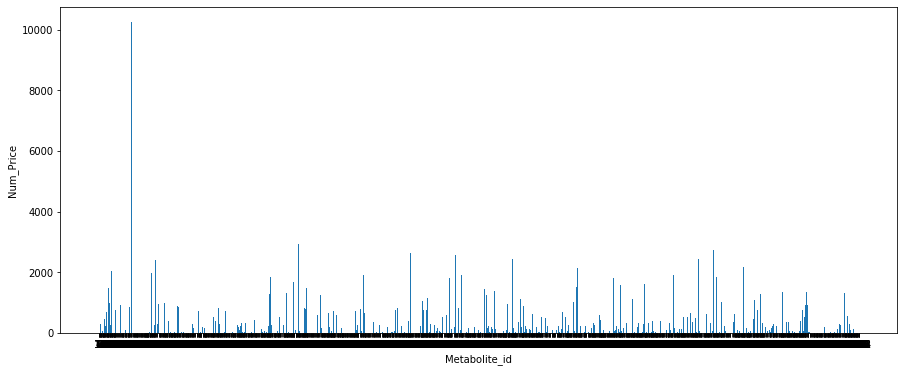

In [20]:
m_id = []
num_price = []
for k,g in df_noNA.groupby('metab_id'):
    m_id.append(k)                               # Criar lista com os ids dos metabolitos
    num_price.append(g.shape[0])                 # Criar lista com o num de preços 
    
plt.figure(figsize=(15,6))                       # Para alterar o tamanho da figura, se ficar neste tamanho dá para ver a barra maior (senão não dá...)
plt.bar(m_id, num_price)                         # Criar gráfico de barras com as duas listas criadas antes
plt.xticks(m_id)
plt.xlabel('Metabolite_id')
plt.ylabel('Num_Price')
plt.show()

In [21]:
#Tentar pôr gráfico acima a dar para ordenar o eixo dos x pelos valores de y
price_met = {}                                                         
for k,g in df_noNA.groupby('metab_id'):                                
    if k not in price_met:
        price_met[k] = g.shape[0]                                      #Create a dictionary with metabolite : num_prices
    elif k in price_met:
        print('There is a metabolite with more than one num_price.')

In [22]:
import operator
sort_price_met = sorted(price_met.items(), key=operator.itemgetter(1), reverse = True)  # The dictionary becomes a list of tuples


print(sort_price_met)  # This list of tuples is already sorte by the y value

[(187, 10248), (1175, 4699), (3743, 3485), (3122, 3430), (3519, 3308), (2300, 3083), (603, 3001), (1531, 2955), (1132, 2920), (2504, 2870), (4193, 2831), (3193, 2817), (3479, 2746), (3013, 2723), (2690, 2718), (1487, 2710), (2605, 2647), (1765, 2623), (13, 2604), (2020, 2574), (873, 2491), (848, 2455), (2565, 2455), (433, 2454), (2452, 2454), (3394, 2453), (2342, 2447), (3532, 2425), (1442, 2420), (323, 2408), (140, 2317), (3080, 2281), (1210, 2216), (1869, 2201), (2273, 2189), (3649, 2187), (2836, 2175), (2710, 2152), (557, 2147), (74, 2057), (618, 2051), (2123, 2026), (2190, 2011), (1285, 2002), (2446, 2001), (1632, 1984), (2652, 1972), (300, 1970), (1152, 1968), (1453, 1967), (1660, 1952), (524, 1945), (3113, 1944), (1908, 1923), (2678, 1922), (1499, 1921), (2054, 1918), (3253, 1903), (2581, 1880), (3496, 1860), (67, 1856), (3124, 1856), (973, 1841), (902, 1832), (2618, 1825), (3975, 1813), (2913, 1808), (1068, 1805), (517, 1804), (1986, 1804), (4154, 1786), (802, 1743), (1565, 1727

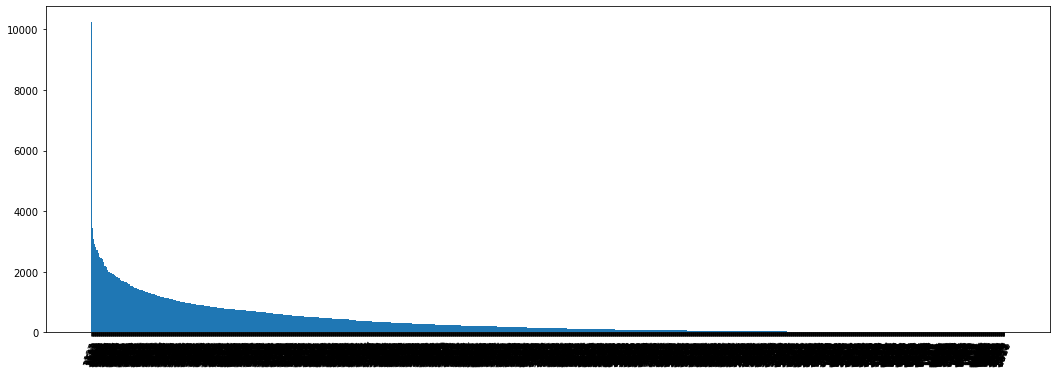

In [23]:
# Create a barplot with the x axis sorted by the y values

plt.figure(figsize=(18,6))  # Para alterar o tamanho da figura, se ficar neste tamanho dá para ver a barra maior (senão não dá)
plt.bar(range(len(sort_price_met)), [val[1] for val in sort_price_met], align='center')  
plt.xticks(range(len(sort_price_met)), [val[0] for val in sort_price_met])
plt.xticks(rotation=70)
plt.show()

In [24]:
# Creating interactive barplot with plotly

data = go.Bar(x = list(range(len(sort_price_met))), y = [val[1] for val in sort_price_met], name = 'Num_Prices')

layout = go.Layout(xaxis = go.layout.XAxis(
                        tickmode = 'array',
                        tickvals = list(range(len(sort_price_met))),
                        ticktext = [val[0] for val in sort_price_met],
                   title = 'Num_Prices_Per_Metabolite'))

#layout = go.Layout(barmode='overlay', title = 'Num_Prices_Per_Metabolite')
#layout = go.Layout(barmode='stack', title = 'Num_Prices_Per_Metabolite')  
#este é melhor para ver o numero total de preços de cada metabolito, ele acrescenta ao nº de preços de uma unidade o nº da outra unidade
                                                                    

fig = go.Figure(data  = data, layout = layout)
po.iplot(fig, show_link= False) # para ver aqui no jupyter
# po.plot(fig)                     # para ver num separador a parte

Como se pode ver é um pouco complicado explicar estes dados, porque são muitos. Talvez criar histogramas seja mais fácil.

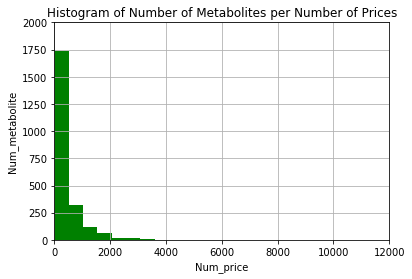

In [25]:
# Create an histogram num_prices per num_metabolites

plt.hist(num_price, 20, facecolor='g')
plt.xlabel('Num_price')
plt.ylabel('Num_metabolite')
plt.title('Histogram of Number of Metabolites per Number of Prices')
plt.axis([0, 12000, 0, 2000])
plt.grid(True)
plt.show()

The histogram is right skewed, which means that the mean of the number of prices is tipically greater than the median.

In [26]:
# Interactive histogram with plotly

fig = go.Figure(
      data=[go.Histogram(x= num_price, name = 'Num Price (g)', opacity = 0.8)]) #Creating histogram with num_price list

fig.update_layout(
    title_text='Num_Metabolites_Per_Num_Prices', # title of plot
    xaxis_title_text='Num_Price', # xaxis label
    yaxis_title_text='Num_Metabolite', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.show()

- **Quantos metabolitos têm preços todos os meses?** (boxplot)

Como só podemos fazer uma análise por metabolito, vou escolher o **metabolito 1175** porque é que tem mais preços e mais providers. **Será o meu caso de estudo.** No entanto, outros casos de estudo possíveis para além dos metabolitos com maior nº de preços e de providers, são os metabolitos com menor variância por mês/ano.

In [27]:
df_1175 = df_noNA[df_noNA.metab_id == 1175] #filtrar o dataframe para apenas o metabolito 1175

In [28]:
df_1175

,metab_id,metab_name,price,amount,unity,provider_name,source,price_per_unity,price_per_g,year,month
date,,,,,,,,,,,
2018-01-10 11:35:15,1175,4-aminopyridine,55.00,1.0,mg,ENAMINE Ltd.,MolPort,55.000000,0.055000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,56.00,2.0,mg,ENAMINE Ltd.,MolPort,28.000000,0.028000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,59.00,5.0,mg,ENAMINE Ltd.,MolPort,11.800000,0.011800,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,78.00,10.0,mg,ENAMINE Ltd.,MolPort,7.800000,0.007800,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,85.00,15.0,mg,ENAMINE Ltd.,MolPort,5.666667,0.005667,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,93.00,20.0,mg,ENAMINE Ltd.,MolPort,4.650000,0.004650,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,100.00,25.0,mg,ENAMINE Ltd.,MolPort,4.000000,0.004000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,108.00,30.0,mg,ENAMINE Ltd.,MolPort,3.600000,0.003600,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,116.00,35.0,mg,ENAMINE Ltd.,MolPort,3.314286,0.003314,2018,1


In [29]:
# Numero de preços que o metabolito 1175 
df_1175.shape[0]

4699

In [30]:
# Quantas unidades este dataframe tem 
df_1175.unity.unique()

array(['mg', 'g', 'kg'], dtype=object)

In [31]:
# Quantos providers diferentes este metabolito tem 
df_1175.provider_name.nunique()

67

In [32]:
# Quantos sources diferentes este metabolito tem 
df_1175.source.unique()

array(['MolPort', 'CHEMSPACE', 'OXChem'], dtype=object)

Este metabolito, 4-aminopyridine (id = 1175), tem **4699 preços**, contando já só com aqueles preços que fazem parte das **unidades das gramas**. Para além disso este metabolito tem preços de **67 providers**, mas apenas **3 sources** (o que até pode ser bom). 

In [33]:
for k,g in df_1175.groupby(['year','month'])['price_per_g']:
    print(list(k))
    print(g)

[2018, 1]
date
2018-01-10 11:35:15    0.055000
2018-01-10 11:35:15    0.028000
2018-01-10 11:35:15    0.011800
2018-01-10 11:35:15    0.007800
2018-01-10 11:35:15    0.005667
                         ...   
2018-01-10 11:35:22    3.000000
2018-01-10 11:35:27    3.800000
2018-01-10 11:35:27    3.700000
2018-01-10 11:35:27    3.600000
2018-01-10 11:35:27    2.230000
Name: price_per_g, Length: 293, dtype: float64
[2018, 2]
date
2018-02-10 11:41:18    0.0550
2018-02-10 11:41:18    0.0280
2018-02-10 11:41:18    0.0118
2018-02-10 11:41:18    0.0078
2018-02-10 11:41:18    0.0380
                        ...  
2018-02-10 11:41:22    3.0000
2018-02-10 11:41:26    3.8000
2018-02-10 11:41:26    3.7000
2018-02-10 11:41:26    3.6000
2018-02-10 11:41:26    2.2300
Name: price_per_g, Length: 284, dtype: float64
[2018, 3]
date
2018-03-10 11:42:58    0.0550
2018-03-10 11:42:58    0.0280
2018-03-10 11:42:58    0.0118
2018-03-10 11:42:58    0.0078
2018-03-10 11:42:58    0.0380
                        ...  

In [34]:
#Criar boxplot com preços por mês 
#Create plot with plotly

df_1175 = df_1175.sort_index()


layout = go.Layout(
    title = 'Boxplot of 4-aminopyridine prices per month',
    yaxis = dict(
        title = 'Price (USD)'
    ),
    xaxis = dict(
        title = 'Month'
    )
)


dict_month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
    
month_list = []
d_y = {}
for k,g in df_1175.groupby(['year','month'])['price_per_g']:
    k = list(k)
    k[1] = dict_month[k[1]]
    k = k[1] +' '+ str(k[0])
    month_list.append(k)
# print(month_list)
    y = g.values
    if k not in d_y:
        d_y[k] = y
    elif k in d_y:
        d_y[k].append(y)
    else: print('There is a key lacking on the y dict.')


def update_plot(signals):#, freq):
    data1 = []
    for s in signals:
        trace1 = go.Box(
            y = d_y[s],
            name =  '{}'.format(s),
            boxpoints='outliers'
        )
    
        data1.append(trace1)
      
    fig = go.Figure(data = data1, layout= layout)
    po.iplot(fig)
    
# data = []
# for s in month_list:
#     trace1 = go.Box(
#         y = d_y[s],
#         name = '{}'.format(s),
#         boxpoints='outliers'
#     )

#     data.append(trace1)


signals = widgets.SelectMultiple(options = month_list, description = 'Date')
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, signals = signals)#, freq = freq)




interactive(children=(SelectMultiple(description='Date', options=('Jan 2018', 'Feb 2018', 'Mar 2018', 'Apr 201…

Como podemos ver a variância não muda muito entre os diferentes boxplots de cada mês!

Isto é apenas o boxplot de todos os preços deste metabolito, agrupados por mês! Eu quero agora tentar juntar neste boxplot graph os boxplots para os preços de cada provider.

In [40]:
#Criar boxplot com preços por mês e **por provider**!!!
#Create plot with plotly

df_1175 = df_1175.sort_index()


layout = go.Layout(
    title = 'Boxplot of 4-aminopyridine prices per month',
    yaxis = dict(
        title = 'Price (USD)'
    ),
    xaxis = dict(
        title = 'Month'
    )
)

#dicionário com os meses todos para poder substituir o número pela palavra
dict_month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

#valores para a opção all_providers
all_p = []    
for k,g in df_1175.groupby(['year','month'])['price_per_g']:   # só se agrupa por mês e ano
    k = list(k)                                                # o mês e o ano têm de ficar como lista
    k[1] = dict_month[k[1]]                                    # substituir o nº do mês pela palavra
    date = k[1] +' '+ str(k[0])                                # criar a string date que vai ficar no x axis
    y = g.values                                           
    for i in y:                                                # colocar numa lista cada valor com a respectiva data      
        all_p.append([date, i])

dict_boxplot = {} #Fazer um dicionário onde os values são listas de listas (ex., [date, valor])
          
dict_boxplot['all_providers'] = all_p                          # colocar os valores de all_providers no dicionário
for k,g in df_1175.groupby(['year','month', 'provider_name'])['price_per_g']:  # agrupar por mês, ano e provider
    k = list(k)                                                # mês, ano e provider têm de ficar como lista para ser mais fácil usar
    k[1] = dict_month[k[1]]                                                        
    date = k[1] +' '+ str(k[0]) 
    y = g.values
    values =[]                                                 # criar lista onde vão ficar as listas 
    for i in y:
        values.append([date, i])                               # pôr na lista uma lista com um dos valores e a respectiva data
#     print(values)
    if k[2] not in dict_boxplot:
        dict_boxplot[k[2]] = values                            # colocar no dicionário o provider e a respectiva lista de listas
    elif k[2] in dict_boxplot:
        dict_boxplot[k[2]].extend(values)                       # se já existir extender a lista existente com outras listas

# print(dict_boxplot)        


list_options=[]                                                # criar uma lista que tenha todos os provviders + all_providers    
for p in dict_boxplot:                                         # para poder usar como opção
    list_options.append(p)

# list_options.sort(key=str.lower)    
        
# print(len(list_options))  #dá certinho com o número de providers que este metabolito tem + a opção de todos os providers    
    
def update_plot(signals):#, freq):
    data1 = []
    for s in signals:
        trace1 = go.Box(
            y = [values[1] for values in dict_boxplot[s]],     # criar gigante lista só com os valores de y (usar valores nas listas da lista)
            x = [values[0] for values in dict_boxplot[s]],     # criar gigante lista com as datas respectivas para cada y
            name =  '{}'.format(s),
            boxpoints= 'all',                                  # 'outliers' assim mostra só os outliers
            boxmean=True                                       # show mean
        )
    
        data1.append(trace1)
      
    fig = go.Figure(data = data1, layout= layout)
    po.iplot(fig)
    

signals = widgets.SelectMultiple(options = list_options, description = 'Date')
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, signals = signals)#, freq = freq)

interactive(children=(SelectMultiple(description='Date', options=('all_providers', 'ACC Corporation', 'AD Chem…

Há providers que acabam a Jun 2019, mas não começam desde Jan 2018:
  - BIONET - Key Organics Ltd. (Ago 2018)
  - BLD Pharmatech Ltd. (Ago 2018)
  - Selleck Chemicals LLC (Ago 2018)
  - Alinda Chemical Trading Company (Nov 2018)
  - InterBioScreen Doo. (Nov 2018)
  - AbaChemscene (Jan 2019)
  - BLD PHARMATECH LTD (Feb 2019)
  - Alichem (Mar 2019)
  - Ambeed, Inc. (Apr 2019)
  - Angene China (Apr 2019)
  - MedChemExpress Europe (Apr 2019)
  - Nanjing HaBo Medical Technology Co., Ltd. (May 2019)
  - Toronto Research Chemicals, Inc. (May 2019)
  - AA BLOCKS (Jun 2019 - só tem o último mês)

Há providers que começam a Jan 2018, mas não têm preços até ao final da janela temporal:
  - ACC Corporation
  - AD Chemical Inc.
  - Acadechem Co., Ltd.
  - Aldlab Chemicals LLC
  - Alinda Chemical, Ltd.
  - Arctom Chemicals LLC
  - Ark Pharm, Inc.
  - Astatech Inc (este aqui tem mesmo uma falha de 6 meses no meio)
  - BIONET / Key Organics Ltd.
  - Bide Pharmatech Ltd.
  - Biocore Pharmtech Limited
  - Carbone Scientific Co., LTD
  - Cohnchem Scientific Co., Ltd
  - Curpys Chemicals
  - FCH Group Chemspace partner (para além de não ir até Jun 2019, falta 1 mês a meio)
  - INTERBIOSCREEN Limited
  - InterBioScreen Ltd.
  - Manchester Organics (13 meses em falta no meio... )
  - OXChem
  - Oxchem Corporation
  - Princeton Bio 
  - Pure Chemistry Scientific Inc.
  - SynQuest Laboratories, Inc.
  - Target Mol (só tem em Jan 2018)
  

Providers que têm preços nos limites das janelas mas têm falhas:
  - UORSY Chemspace partner (falta Ago 2018, Feb 2019, Mar 2019)
 

Tentar ter estas respostas em código.

Acho que é suposto colocar a média dos meses anteriores nos meses que estão em falta.

In [107]:
#Calcular quantos providers têm preços para todos os meses(%)

dict_month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

time_window = ['Jan 2018', 'Nov 2018', 'Mar 2018', 'May 2018', 'Jul 2018', 'Sep 2018', 'Jan 2019', 'Mar 2019', 'May 2019', 
               'Feb 2018', 'Apr 2018', 'Jun 2018', 'Ago 2018', 'Oct 2018', 'Dec 2018', 'Feb 2019', 'Apr 2019', 'Jun 2019' ]

def date_str(k):    # k é a lista que se cria quando se faz o groupby (tem 3 valores: year, month, provider_name)
    k[1] = dict_month[k[1]]                                                        
    date = k[1] +' '+ str(k[0]) 
    return date

dict_prov = {}      # dicionário com lista de listas em que tem o valor e a data 

for k,g in df_1175.groupby(['year','month', 'provider_name'])['price_per_g']:  # agrupar por mês, ano e provider
    k = list(k)                                                # mês, ano e provider têm de ficar como lista para ser mais fácil usar
    date = date_str(k) 
    y = g.values
    values =[]                                                 # criar lista onde vão ficar as listas 
    for i in y:
        values.append([date, i])                               # pôr na lista uma lista com um dos valores e a respectiva data
#     print(values)
    if k[2] not in dict_prov:
        dict_prov[k[2]] = values                            # colocar no dicionário o provider e a respectiva lista de listas
    elif k[2] in dict_prov:
        dict_prov[k[2]].extend(values)      

# print(dict_prov)

prov_all_month = []
prov_almost_all_m = []
for prov in dict_prov:
    all_month = True
    month = {}
    for values in dict_prov[prov]:
        if values[0] not in month:
            month[values[0]] = [values[1]]
        elif values[0] in month:
            month[values[0]].append(values[1])
#     print(month)
    if len(month) != 18: all_month = False
    elif len(month) == 18:
        if any(v > 0.5 for m in month for v in month[m]):
            all_month = True
        elif all(v > 0 and v < 0.5 for m in month for v in month[m]):
            all_month = False
            prov_almost_all_m.append(prov) 
    
                    
    if all_month == True:
        prov_all_month.append(prov)
        

# Find which provider doesn't have prices for all the months and how many months are lacking
# There are 18 months on total

prov_flaw = {}
prov_flaw_below_1 = []
for prov in dict_prov:
    month = {}
    for values in dict_prov[prov]:
        if values[0] not in month:
            month[values[0]] = [values[1]]
        elif values[0] in month:
            month[values[0]].append(values[1])
#     print(month)
    for t in time_window:
        if t not in month.keys():
            times = 1
            if prov not in prov_flaw:
                prov_flaw[prov] = times
            elif prov in prov_flaw:
                prov_flaw[prov] += 1
    if all( v < 0.5 for m in month for v in month[m]):
        if prov not in prov_flaw_below_1:
            prov_flaw_below_1.append(prov)
            

print('Providers with prices for each month:\n\n', prov_all_month, '\n')     #providers que têm preços todos os meses!!
print('Percentage: ', len(prov_all_month)*100/67,'%', '(', len(prov_all_month),'of 67 providers)', '\n')
print('----------------------------------------------------------------------------------\n')
print('Providers with prices for each month but below 0.5:\n\n', prov_almost_all_m, '\n')
print('Percentage: ', len(prov_almost_all_m)*100/67,'%', '(', len(prov_almost_all_m),'of 67 providers)','\n')
print('----------------------------------------------------------------------------------\n')
print('Providers which do not have prices for all months and how many months are lacking:\n\n', prov_flaw, '\n')
print('Percentage: ', len(prov_flaw)*100/67,'%','(', len(prov_flaw),'of 67 providers)','\n\n')
print('From the providers above, these have prices consistently below 0.5:\n\n', prov_flaw_below_1,'\n')
print('Percentage: ', len(prov_flaw_below_1)*100/67,'%','(', len(prov_flaw_below_1),'of 67 providers)','\n\n')

Providers with prices for each month:

 ['AK Scientific Inc.', 'AK Scientific, Inc.', 'AOBChem USA', 'Accela ChemBio Inc.', 'Aldlab', 'Angene', 'Angene International Limited', 'Apollo Scientific', 'Cayman Europe', 'ChemShuttle', 'ENAMINE Ltd.', 'Enamine Ltd Chemspace partner', 'Fluorochem Limited', 'HTS Biochemie Innovationen', 'Labseeker', 'Manchester Organics Limited', 'Pharmeks, Ltd.', 'Specs', 'StruChem CO., LTD', 'Toronto Research Chemicals', 'UkrOrgSynthesis'] 

Percentage:  31.34328358208955 % ( 21 of 67 providers) 

----------------------------------------------------------------------------------

Providers with prices for each month but below 0.5:

 ['BIOTREND Chemicals, AG', 'Life Chemicals Inc.', 'Maybridge, Ltd.', 'Otava, Ltd.', 'Tocris Bioscience', 'Vitas-M Laboratory, Ltd.'] 

Percentage:  8.955223880597014 % ( 6 of 67 providers) 

----------------------------------------------------------------------------------

Providers which do not have prices for all months and how

**Duvida:** Estes providers abaixo de 0.5 USD deviam contar? É que nem arredonda a 1 USD...